## Ejercicios de pair programming 19 enero: Asunciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest
from scipy.stats import levene
import researchpy as rp
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Abrimos el df completo con outliers
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [3]:
#Abrimos el dataset solo de outliers
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [4]:
#Abrimos el dataset sin outliers
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Papua-Neuguinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0
1,Madagaskar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0
2,Afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0
3,Niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0
4,Gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

### Normalidad

In [5]:
print(f'''La normalidad del conjunto de datos es: 
{kstest(df['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los outliers es: 
{kstest(outliers['exposure'], 'norm')}''')
print ('---------------------')
print(f'''La normalidad de los datos sin outliers es: 
{kstest(df_limpio['exposure'], 'norm')}''')
print ('---------------------')

La normalidad del conjunto de datos es: 
KstestResult(statistic=0.9829459870076139, pvalue=0.0)
---------------------
La normalidad de los outliers es: 
KstestResult(statistic=0.966824644549763, pvalue=1.559977630884e-312)
---------------------
La normalidad de los datos sin outliers es: 
KstestResult(statistic=0.9851781284996995, pvalue=0.0)
---------------------


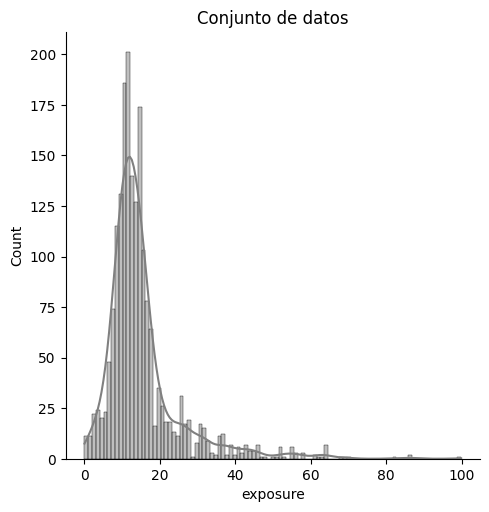

In [6]:
sns.displot(df["exposure"], kde = True, color = "grey")
plt.title('Conjunto de datos');

<Figure size 800x400 with 0 Axes>

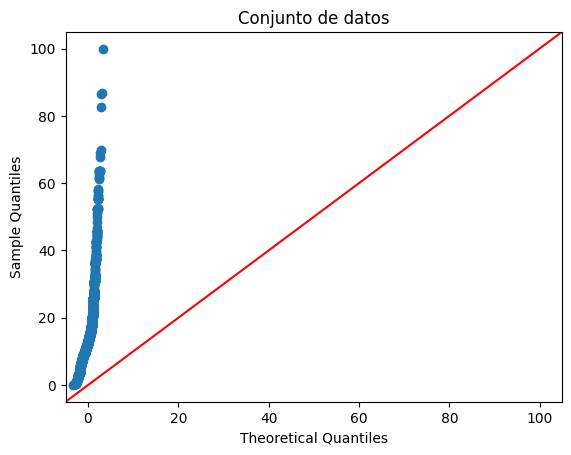

In [7]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df["exposure"], line ='45')
plt.title('Conjunto de datos');

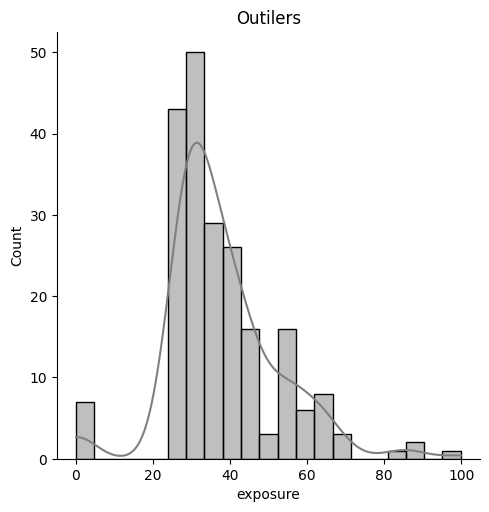

In [8]:
sns.displot(outliers["exposure"], kde = True, color = "grey")
plt.title('Outilers');

<Figure size 800x400 with 0 Axes>

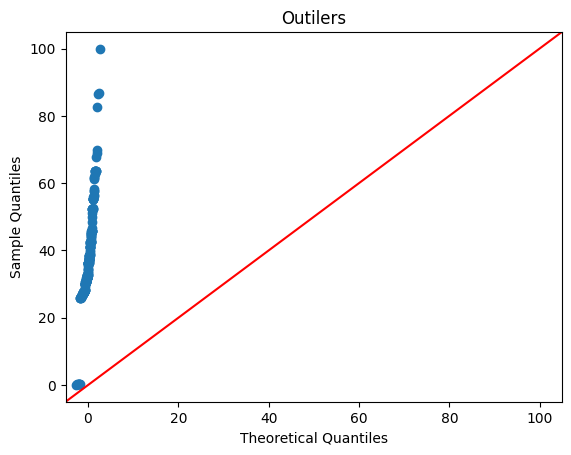

In [9]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(outliers["exposure"], line ='45')
plt.title('Outilers');

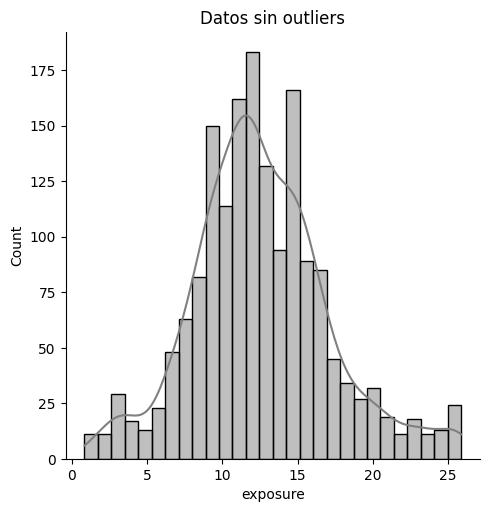

In [10]:
sns.displot(df_limpio["exposure"], kde = True, color = "grey")
plt.title('Datos sin outliers');

<Figure size 800x400 with 0 Axes>

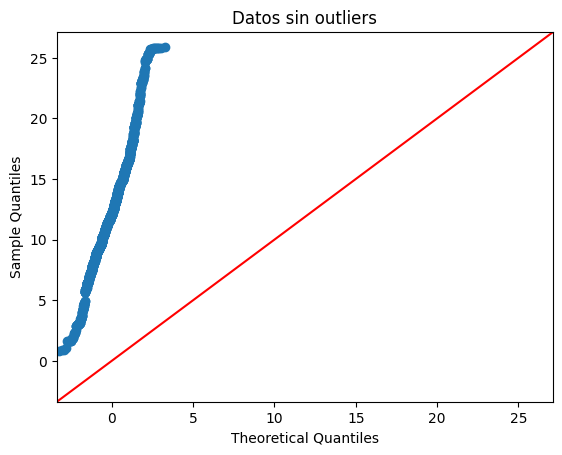

In [11]:
plt.figure(figsize =(8,4))
fig = sm.qqplot(df_limpio["exposure"], line ='45')
plt.title('Datos sin outliers');

Nuestra variable respuesta no es normal, sin embargo al quitar los outliers tiende un poco mas a la normalidad.

### Correlación - Independencia

In [12]:
df.columns

Index(['region', 'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category', 'wri', 'exposure', 'vulnerability',
       'susceptibility', 'lack_of_coping_capabilities',
       'lack_of_adaptive_capacities', 'year'],
      dtype='object')

In [13]:
crosstab, test_results, expected = rp.crosstab(df["exposure_category"], df["wri_category"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [14]:
test_results #Vemos la correlación/independencia entre las variables categóricas de exposure category y wri category

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,2214.2685
1,p-value =,0.0000
2,Cramer's V =,0.5374


Como el p-valor de estas variables es 0.0000, es menor a 0.05 con lo cual podemos rechazamos H0 y por lo cual podemos inferir que las variables wri_cagegory y exposure_category son dependientes entre ellas, es decir a mayor categoria del WRI mayor exposure a desastres naturales.

In [15]:
crosstab2, test_results2, expected = rp.crosstab(df["exposure_category"], df["vulnerability_category"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [16]:
test_results2 #Vemos la correlacion/independencia entre las variables categoricas de categoria de exposure y de vulnerability

,Chi-square test,results
0,Pearson Chi-square ( 16.0) =,342.3028
1,p-value =,0.0000
2,Cramer's V =,0.2113


Como el p-valor es también 0 podemos determinar que las variables son dependientes. Es decir que existe una relación entre la categoría de exposure y de vulnerabilidad.

### Homogeneidad

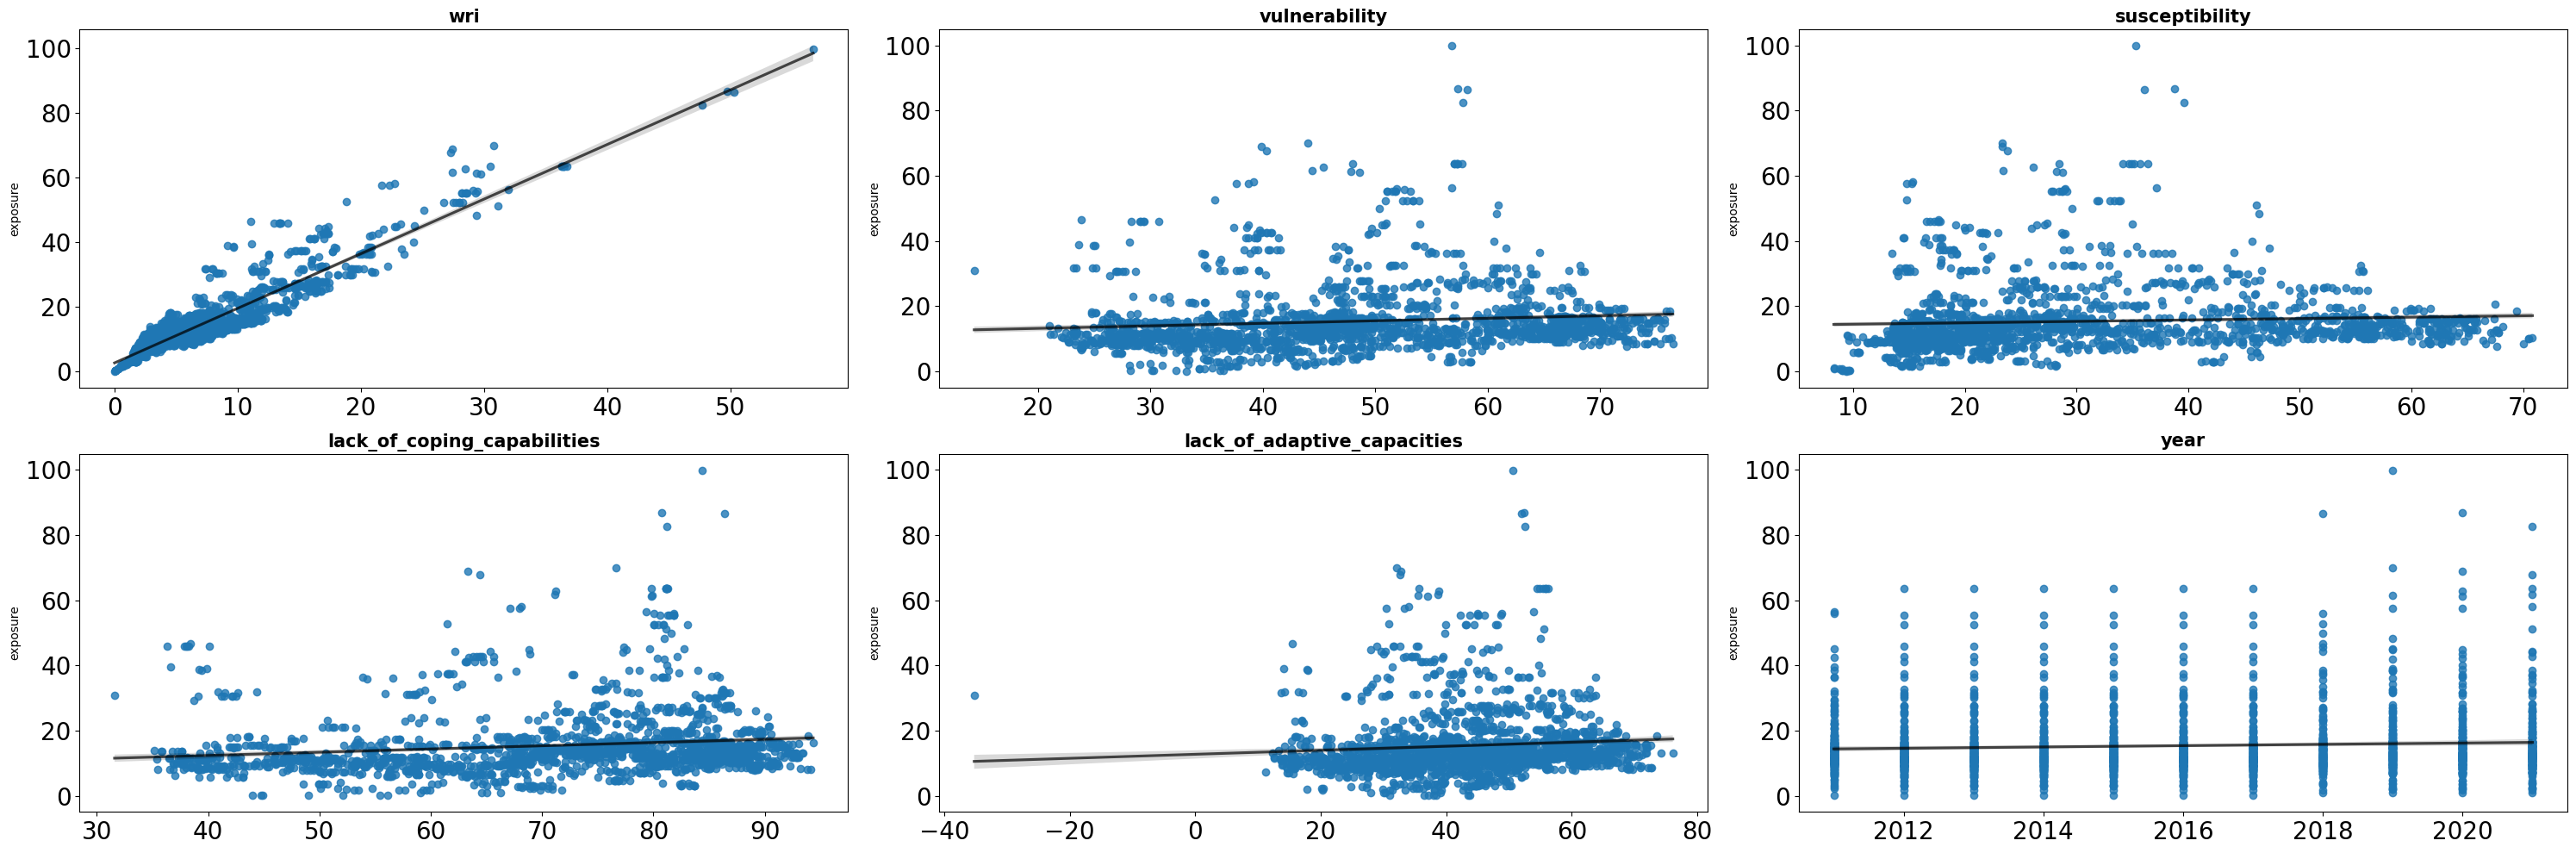

In [17]:
# Representamos graficamente un regplot de las variables numéricas para ver la homogeneidad
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('exposure', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para iterar por als columnas
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'exposure',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

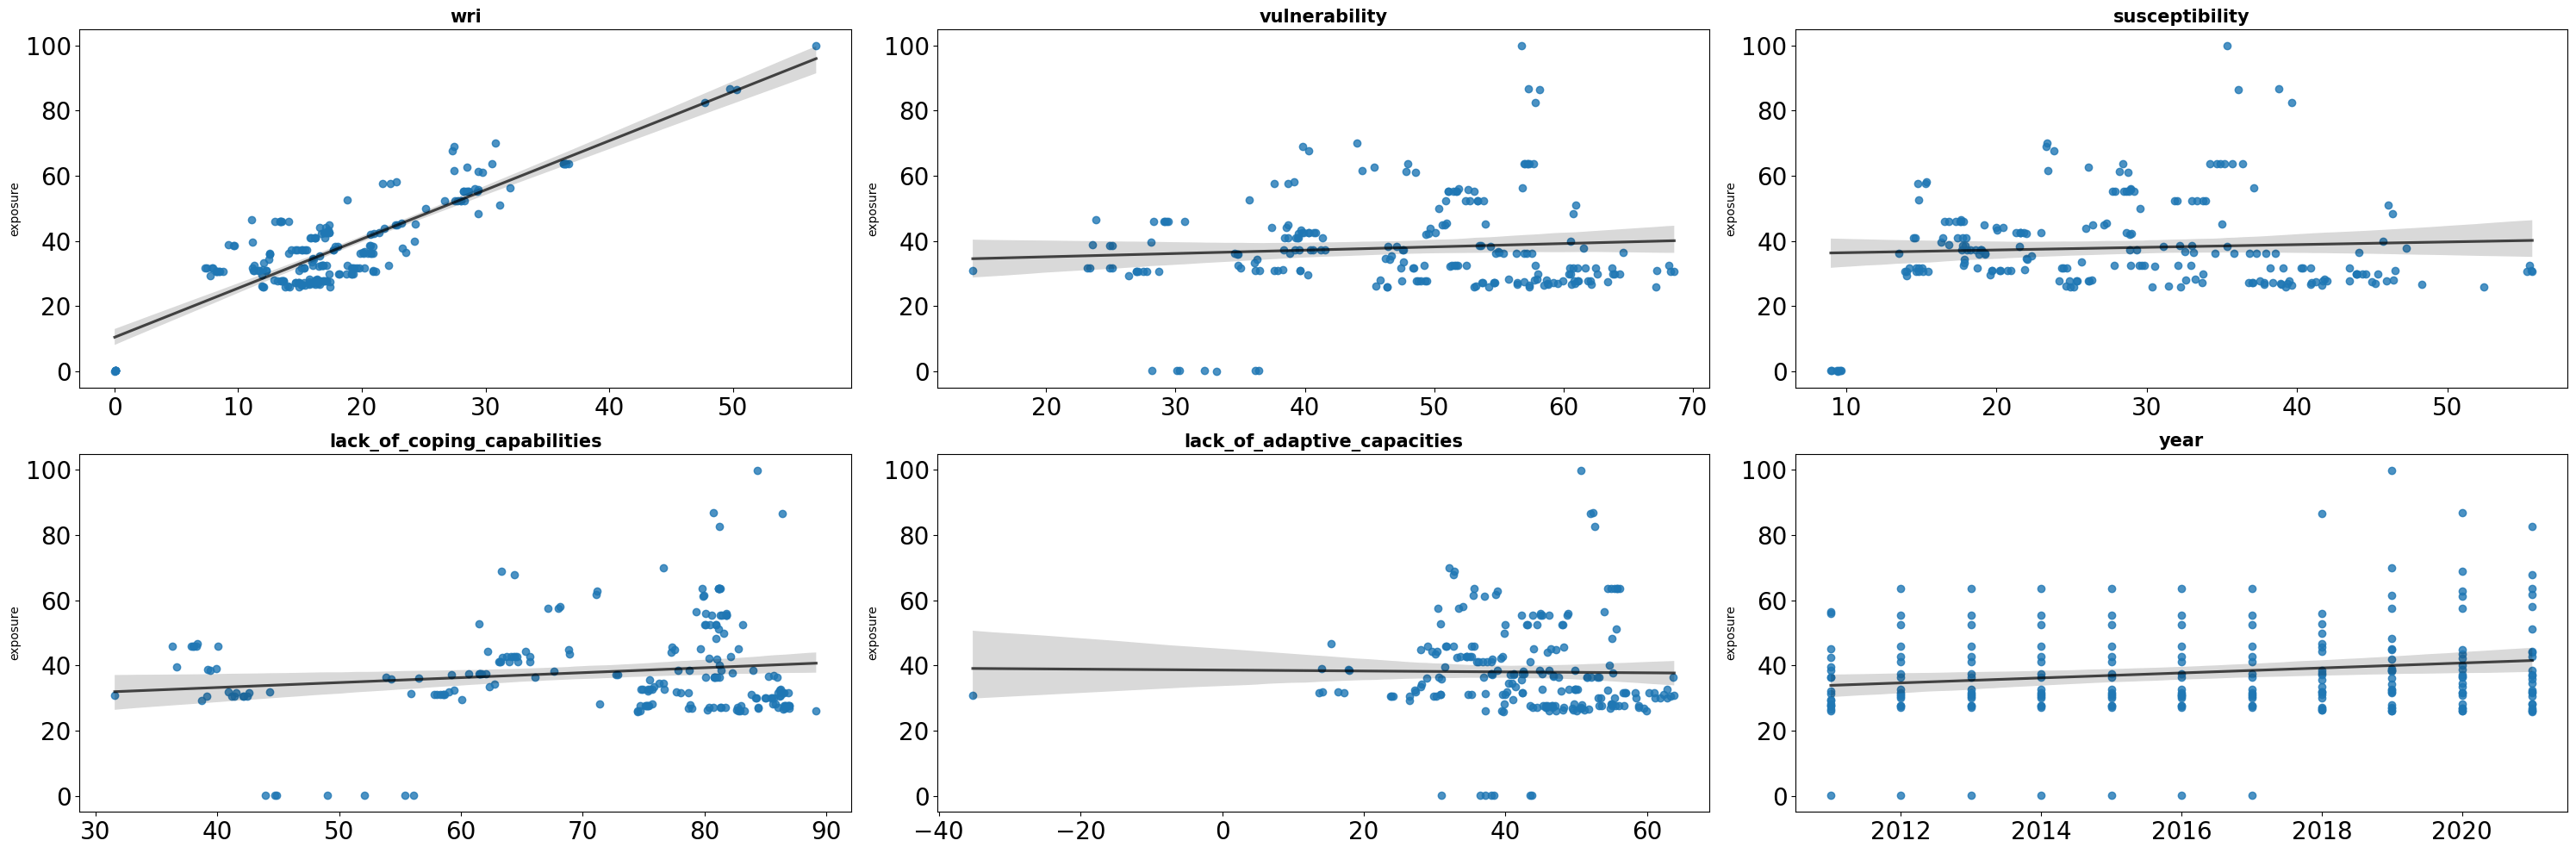

In [18]:
# Hacemos lo mismo para todos los df
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('exposure', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = outliers,
        x = colum,
        y = 'exposure',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

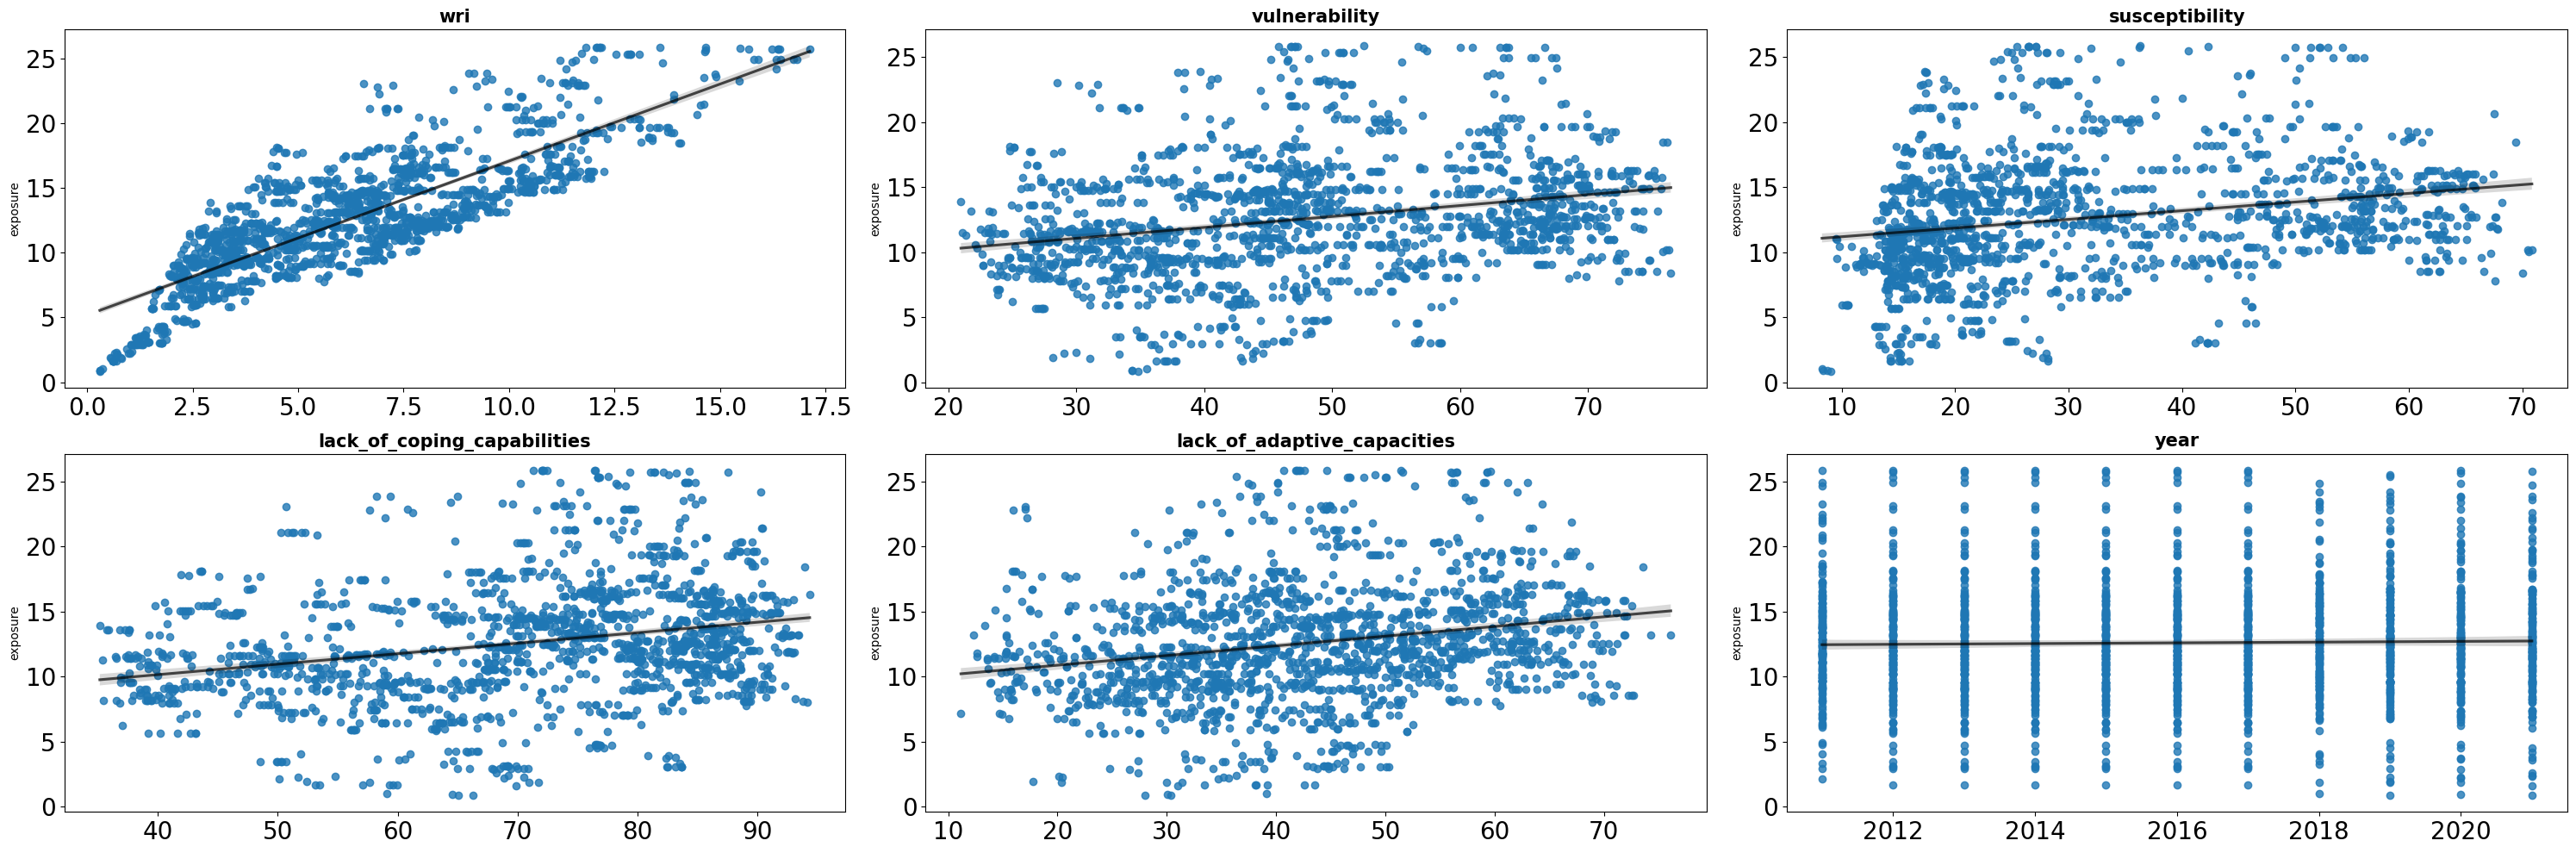

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('exposure', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df_limpio,
        x = colum,
        y = 'exposure',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

In [20]:
# Vemos de forma analítica la relación de homogeneidad entre las variables y la variable respuesta
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de exposure
numericas_col = df.select_dtypes(include = np.number).drop("exposure", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.exposure, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

resultados

{'wri': 2.1501106833819567e-25,
 'vulnerability': 1.6044650114051838e-94,
 'susceptibility': 1.8291721562153031e-93,
 'lack_of_coping_capabilities': 2.2532859502429167e-98,
 'lack_of_adaptive_capacities': 9.329778121402379e-81,
 'year': 1.9433756273023244e-55}

In [21]:
#Lo hacemos también para el df sin outliers
resultados = {}

numericas_col = df_limpio.select_dtypes(include = np.number).drop("exposure", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df_limpio[col], df_limpio.exposure, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

resultados

{'wri': 5.20225992621115e-25,
 'vulnerability': 1.629830566593073e-301,
 'susceptibility': 3.1262729324522067e-218,
 'lack_of_coping_capabilities': 7.41073991560912e-265,
 'lack_of_adaptive_capacities': 1.4035901321139702e-281,
 'year': 2.983385476766223e-18}

Todos nuestros p-valores son menores a 0.05, con lo cual acpetamos HO y por lo tanto no cumplen la asunción de homocedasticidad y son heterocedasticos.
En las gráficas podemos ver que los únicos que podrían ser relativamente homocedasticos son wri y exposure.
